# 맥북 데이터
## 연식에 따른 중고가 데이터 분석
반비례(음의 선형관계)관계가 있는 것 같음

(80, 2)


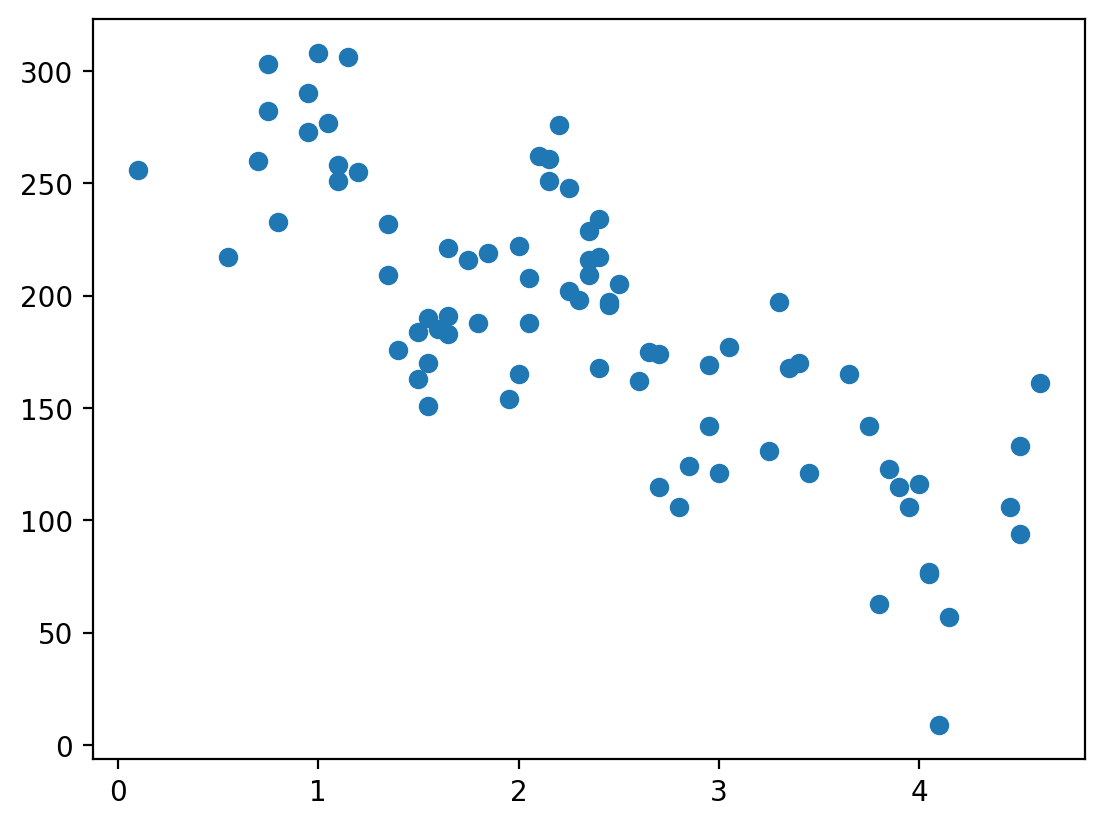

상관매트릭스
[[ 1.         -0.78972238]
 [-0.78972238  1.        ]]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

macbook = pd.read_csv('./macbook.csv')
print(macbook.shape)
macbook.head()

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

print("상관매트릭스")
print(np.corrcoef(macbook['used_years'], macbook['price']))

In [9]:
x = macbook["used_years"].values
y = macbook["price"].values

아래 `def gradient` 함수에서 사용되는 수식은 수치미분(차분근사) 수식으로
$$f′(a)=\lim_{x→a} \frac{f(x)−f(a)}{x−a}​=\lim_{Δx→0} \frac{f(a+Δx)−f(a)}{Δx}​$$

`Δx`를 매우 작은 수인 0.0001로 임의로 지정

Iteration[0]: Loss 188.49668415517075 W=2.949280729434122 b=2.9447639689597054
Iteration[100]: Loss 107.76721875439281 W=40.25545052695156 b=53.84405440374462
Iteration[200]: Loss 94.3406951173968 W=28.023977386164688 b=88.38571703755815
Iteration[300]: Loss 81.64100800042542 W=16.060070196142306 b=121.95550199259242
Iteration[400]: Loss 69.98667027228414 W=4.599353457701682 b=154.11329303340904
Iteration[500]: Loss 59.814923925138835 W=-6.106473591704798 b=184.1529281112788
Iteration[600]: Loss 51.62326204091011 W=-15.710728361246652 b=211.10164553377797
Iteration[700]: Loss 45.752736976619715 W=-23.83487555814179 b=233.89730766056016
Iteration[800]: Loss 42.0996168677034 W=-30.235563262015376 b=251.8570898551833
Iteration[900]: Loss 40.111254588878566 W=-34.95141938198765 b=265.0893787531363
Iteration[1000]: Loss 39.130392742012866 W=-38.2603141081338 b=274.3738543417653
Iteration[1100]: Loss 38.67398024747293 W=-40.51614561472172 b=280.7035246173275
Iteration[1200]: Loss 38.46788906

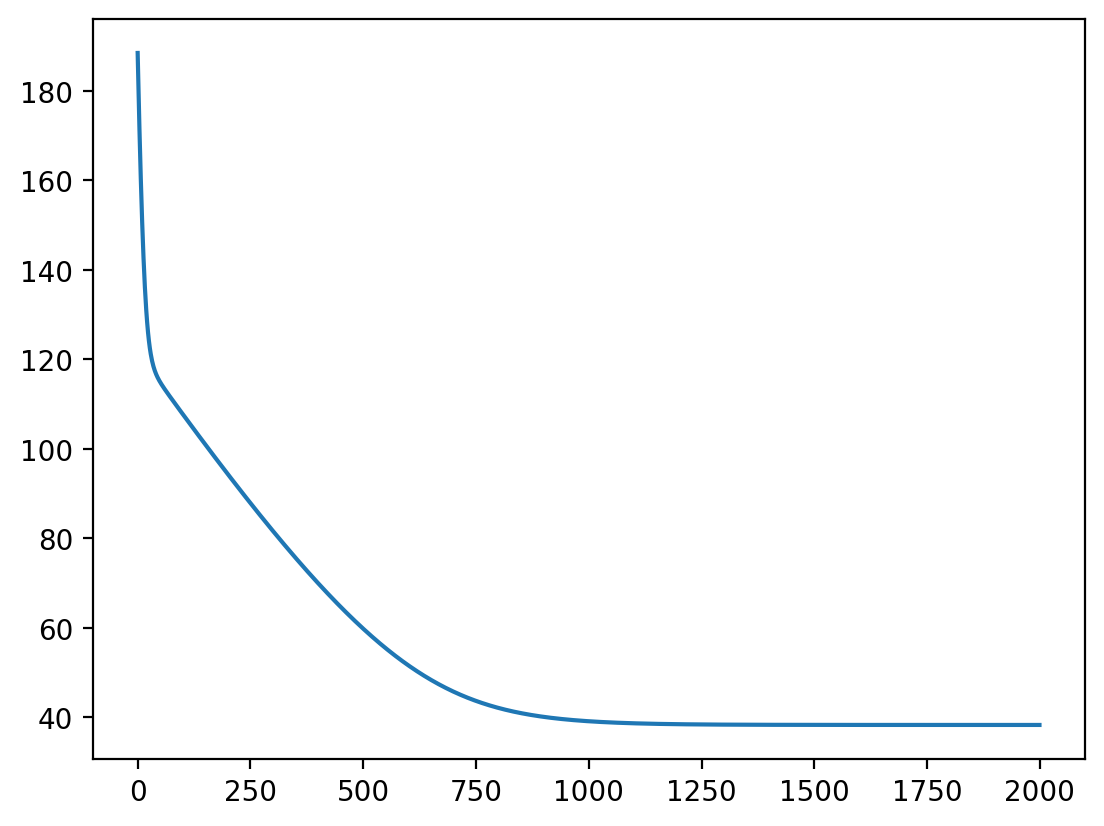

In [11]:
def model(x, w, b):
    y = w * x + b
    return y

def rmse(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse

def loss(x, y, w, b):
    predictions = model(x, w, b)
    L = rmse(predictions, y)
    return L

def gradient(x, y, w, b):
    dw = (loss(x, y, w + 0.0001, b) - loss(x, y, w, b)) / 0.0001
    db = (loss(x, y, w, b + 0.0001) - loss(x, y, w, b)) / 0.0001
    return dw, db


def train(epoch=2000, learning_rate=1):
    w, b = 1, 2
    losses = []
    
    for i in range(epoch):
         dw, db = gradient(x, y, w, b)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
         w -= learning_rate * dw         # 5번: w = w - η * dw 로 업데이트
         b -= learning_rate * db         # 5번: b = b - η * db 로 업데이트 
         L = loss(x, y, w, b)            # 현재의 loss 값 계산
         losses.append(L)                # loss 값 기록
         
         if i % 100 == 0:
            print(f'Iteration[{i}]: Loss {L} W={w} b={b}')

    return losses, w, b

losses, w, b = train()

plt.plot(losses)
plt.show()

-44.92791340229496 293.08256774122765


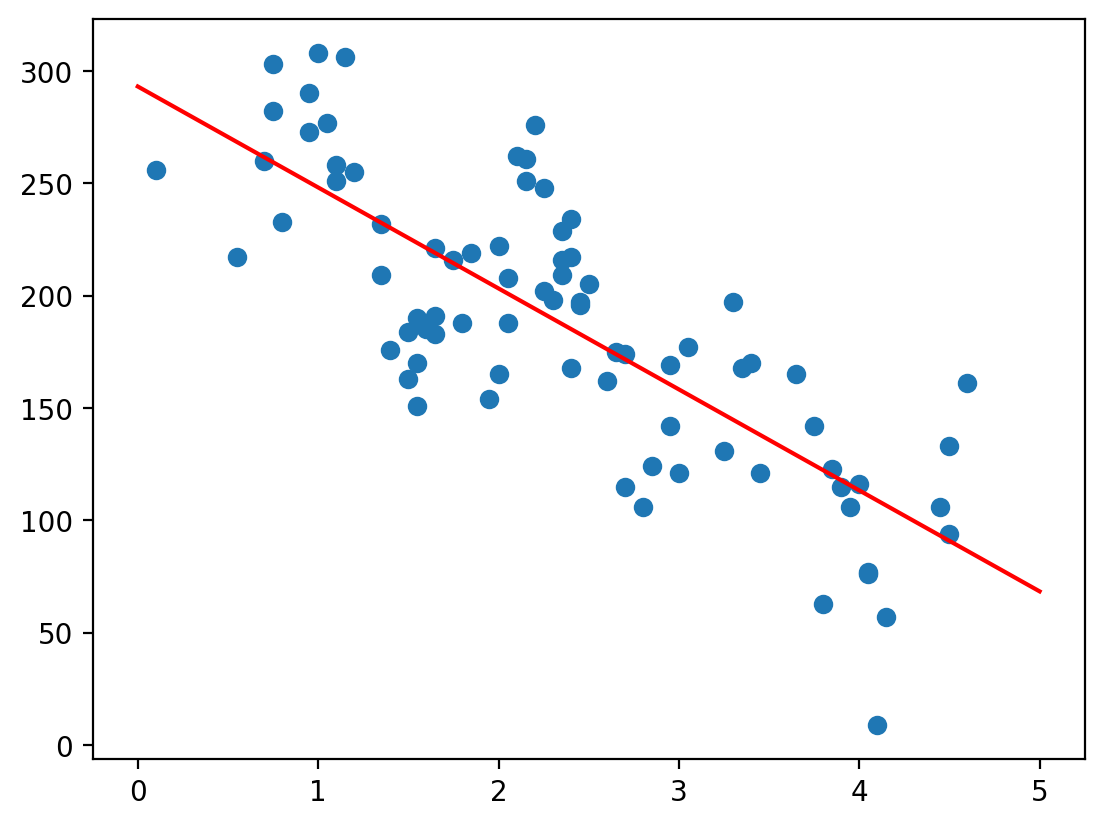

In [12]:
x_random = np.linspace(0, 5, 6)
y_pred = model(x_random, w, b)

print(w, b)


plt.plot(y_pred, c="r")
plt.scatter(macbook['used_years'], macbook['price'])

(20, 2)


,used_years,price,prediction,error
0,1.20,203,239.169072,-36.169072
1,1.85,206,209.965928,-3.965928
2,2.40,191,185.255576,5.744424
3,2.85,164,165.038015,-1.038015
4,3.05,176,156.052432,19.947568
5,3.35,136,142.574058,-6.574058
6,2.55,133,178.516389,-45.516389
7,2.60,181,176.269993,4.730007
8,2.50,181,180.762784,0.237216
9,3.10,86,153.806036,-67.806036


rmse = 45.03925715899346


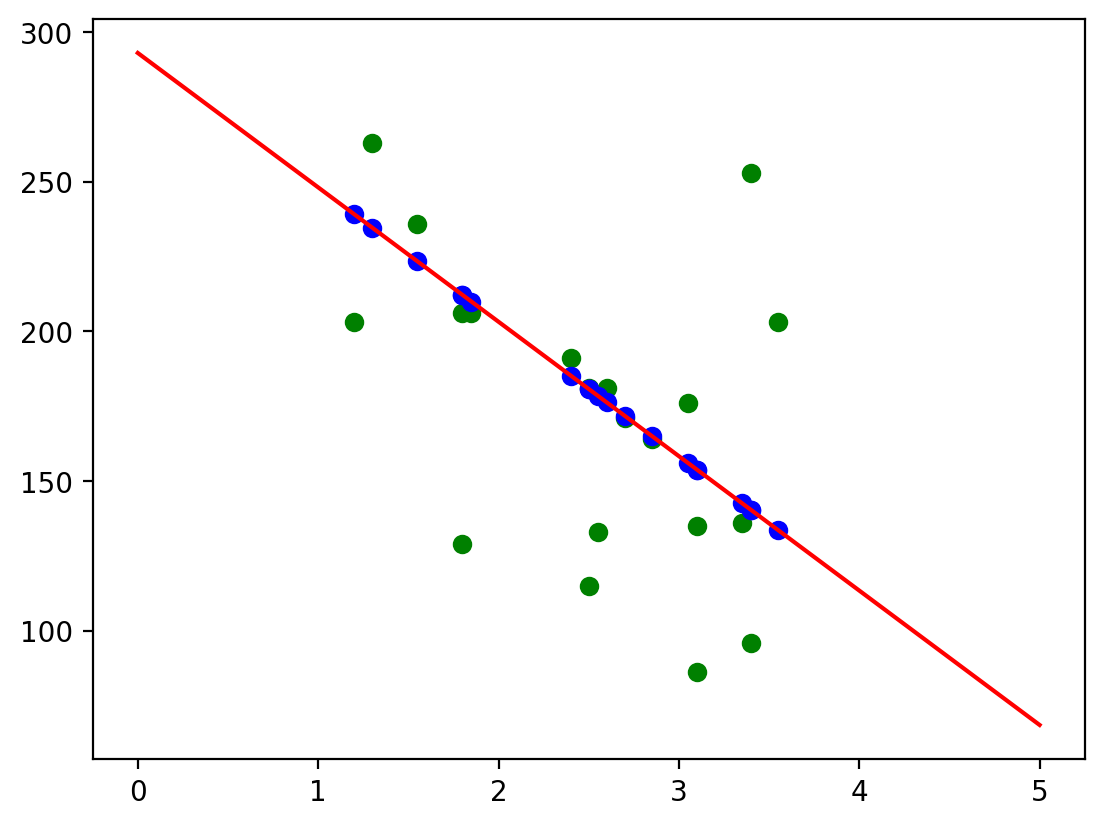

In [18]:
test = pd.read_csv("./macbook_test.csv")
print(test.shape)
test.head()

x_test = test['used_years'].values
y_test = test['price'].values

prediction = model(x_test, w, b)
test['prediction'] = prediction
test['error'] = test['price'] - test['prediction']
_rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5

display(test)
print(f"rmse = {_rmse}")

# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'], c="g")

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'], c="b")
plt.show()

# 참고
[상관관계와 인과관계](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)